# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ryan Fahreza Putra
- **Email:** m322d4ky2763@bangkit.academy
- **ID Dicoding:** Ryan Fahreza Putra

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas Udara di daerah Guanyuan dari tahun 2013 sampai dengan tahun 2017 ? (berdasarkan PM10)
- Sebarapa sering turun hujan di daerah tersebut? dan adakah kaitannya dengan kualitas udara?

## Import Semua Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
5,6,2013,3,1,5,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,N,3.7,Guanyuan
6,7,2013,3,1,6,6.0,6.0,6.0,20.0,400.0,66.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Guanyuan
7,8,2013,3,1,7,3.0,3.0,7.0,26.0,400.0,61.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Guanyuan
8,9,2013,3,1,8,3.0,6.0,9.0,37.0,500.0,50.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Guanyuan
9,10,2013,3,1,9,7.0,11.0,9.0,30.0,400.0,58.0,1.2,1028.5,-19.3,0.0,N,2.6,Guanyuan


In [4]:
df.shape

(35064, 18)

### Assessing Data

In [5]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [7]:
# check duplicate dataset
df.duplicated().sum()

0

### Cleaning Data

In [8]:
# checking value dari fitur yang saya tidak kenal
df['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [9]:
df['WSPM'].unique()

array([ 4.4,  4.7,  5.6,  3.1,  2. ,  3.7,  2.5,  3.8,  4.1,  2.6,  3.6,
        5.1,  4.3,  2.8,  3.9,  2.1,  0.8,  1.8,  1.4,  1.1,  1.7,  0.9,
        0.7,  1.2,  1.6,  2.7,  1.5,  1.3,  0.4,  2.3,  5.9,  2.9,  0. ,
        1. ,  0.5,  3. ,  2.4,  3.4,  3.5,  0.2,  1.9,  0.6,  3.3,  0.1,
        4.5,  7.7,  7.4,  7.9,  7.2,  6.7,  4.8,  4.6,  5.2,  4. ,  2.2,
        3.2,  6.5,  6.2,  7. ,  5. ,  4.2,  8.3,  5.4,  5.8,  7.3,  6.3,
        5.5,  6.1,  7.6,  6. ,  6.4,  6.6,  5.3,  4.9,  5.7,  7.1,  6.8,
        6.9,  7.5,  9.1,  8. ,  8.1,  8.4,  0.3,  nan, 11.2,  8.2,  8.5,
        9.2,  8.8,  8.9,  8.6])

In [10]:
# drop fiture karena dirasa tidak penting
df_cleaned = df.drop(['wd', 'WSPM'], axis=1)

In [11]:
# mencari missing value
columns_to_fill = ['CO', 'SO2', 'NO2', 'O3', 'PM2.5', 'PM10']

mean_values = df_cleaned[columns_to_fill].mean()

df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna(mean_values)

In [12]:
df_cleaned.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP       20
PRES       20
DEWP       20
RAIN       20
station     0
dtype: int64

In [13]:
# dropping missing value
value_to_drop = ['TEMP', 'PRES', 'DEWP', 'RAIN']

df_cleaned = df_cleaned.dropna(subset = value_to_drop)

In [14]:
# mengubah tahun menjadi cattegory
df_cleaned['year'] = df_cleaned.year.astype('category')

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35044 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   No       35044 non-null  int64   
 1   year     35044 non-null  category
 2   month    35044 non-null  int64   
 3   day      35044 non-null  int64   
 4   hour     35044 non-null  int64   
 5   PM2.5    35044 non-null  float64 
 6   PM10     35044 non-null  float64 
 7   SO2      35044 non-null  float64 
 8   NO2      35044 non-null  float64 
 9   CO       35044 non-null  float64 
 10  O3       35044 non-null  float64 
 11  TEMP     35044 non-null  float64 
 12  PRES     35044 non-null  float64 
 13  DEWP     35044 non-null  float64 
 14  RAIN     35044 non-null  float64 
 15  station  35044 non-null  object  
dtypes: category(1), float64(10), int64(4), object(1)
memory usage: 4.3+ MB


### Explore ...

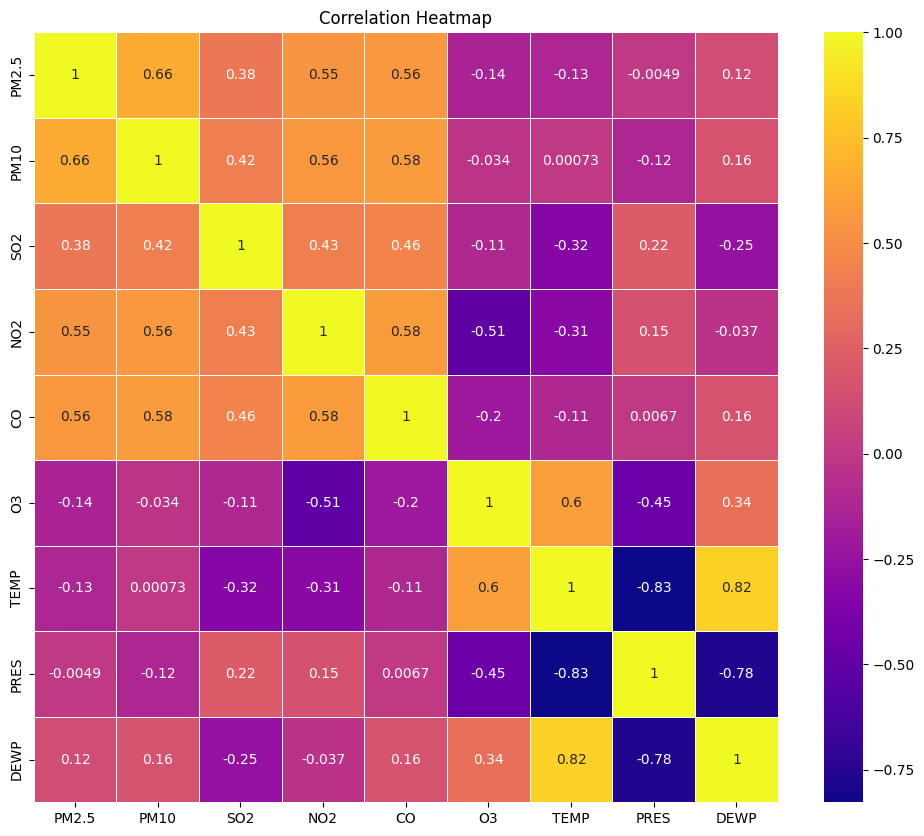

In [33]:
# membuat heatmap untuk melihat fitur yang dirasa sama
corr_matrix = df_cleaned.iloc[:,5:14].dropna().corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', linewidth=0.5)

plt.title("Correlation Heatmap")
plt.show()

From heatmap, i know that the fiture is PM2.5, PM10, CO, and NO2

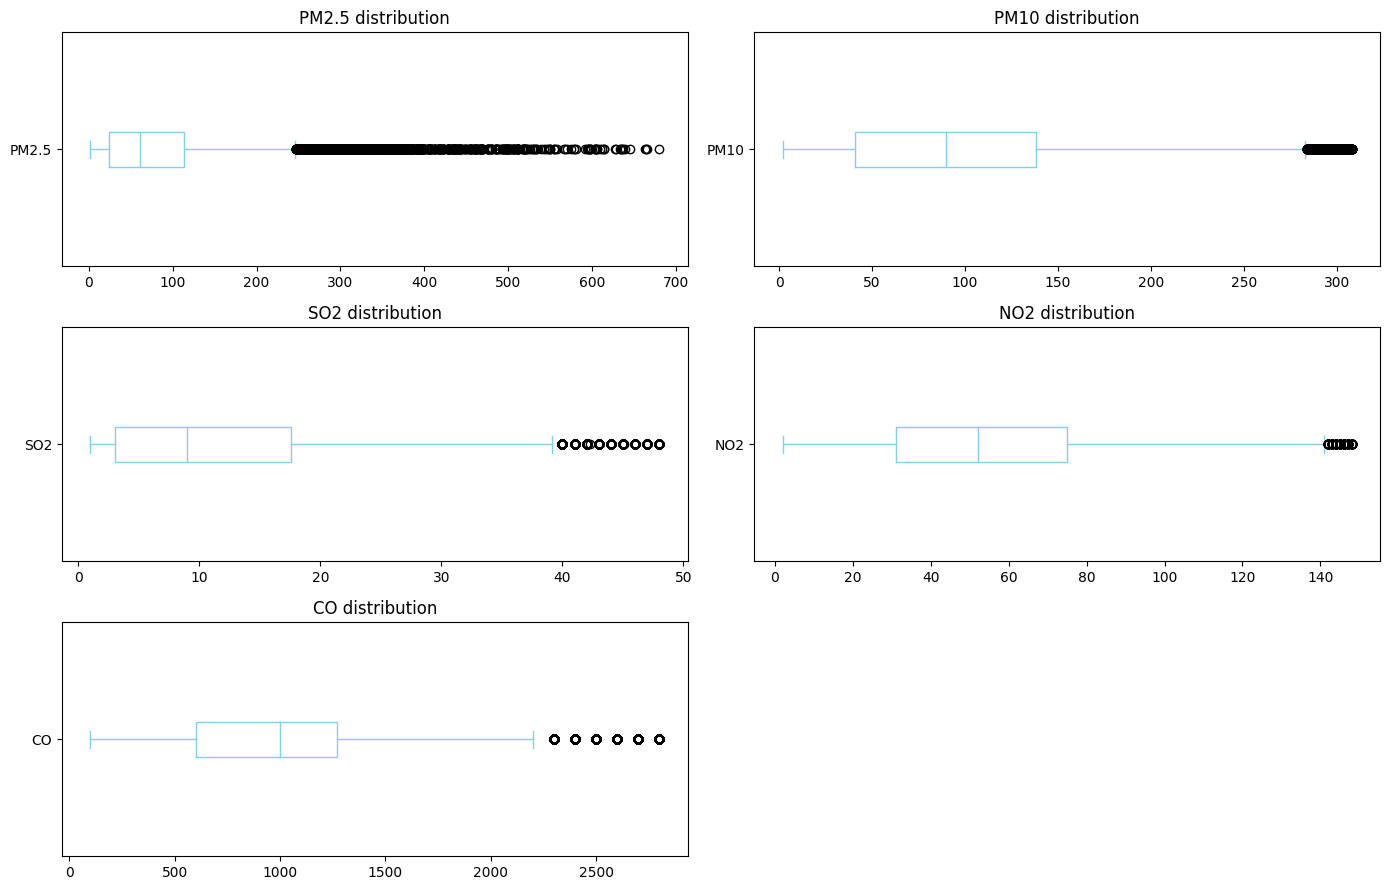


Outliers count for each specified feature:
PM2.5: 1650
PM10: 460
SO2: 1093
NO2: 198
CO: 1772


In [28]:
def plot_and_count_outliers(data, features):
    num_features = len(features)
    num_rows = (num_features + 1) // 2  # Adjusted to have 2 columns per row

    fig, ax = plt.subplots(num_rows, 2, figsize=(14, 3 * num_rows))
    ax = ax.flatten()
    outliers_count = {}

    for i, feature in enumerate(features):
        data[feature].plot(kind='box', ax=ax[i], vert=False, color='skyblue')
        ax[i].set_title("{} distribution".format(feature))

        # Calculate outliers
        q1 = data[feature].quantile(0.25)
        q3 = data[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Count outliers
        outliers_lower = data[data[feature] < lower_bound]
        outliers_upper = data[data[feature] > upper_bound]
        outliers_count[feature] = outliers_lower.shape[0] + outliers_upper.shape[0]

    # Remove any remaining unused subplots
    for i in range(num_features, len(ax)):
        fig.delaxes(ax[i])

    plt.tight_layout()
    plt.show()

    return outliers_count

# Specify the features you want to analyze
features_to_analyze = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO']

# Call the function with the specified features
outlier_counts = plot_and_count_outliers(df_cleaned, features_to_analyze)

# Print outlier counts for the specified features
print("\nOutliers count for each specified feature:")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count}")


In [29]:
# Function to replace outliers with the mean
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the mean
    mean = df[column].mean()
    df[column] = df[column].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

    return df

df_cleaned = replace_outliers_with_mean(df_cleaned, 'PM10')
df_cleaned = replace_outliers_with_mean(df_cleaned, 'SO2')
df_cleaned = replace_outliers_with_mean(df_cleaned, 'NO2')
df_cleaned = replace_outliers_with_mean(df_cleaned, 'CO')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas Udara di daerah Guanyuan dari tahun 2013 sampai dengan tahun 2017 ? (berdasarkan PM10)

In [30]:
# aggregate PM10 berdasar tahun
df_agg = df_cleaned.groupby('year').agg({
    'PM10' : 'mean'
}).reset_index()
df_agg

,year,PM10
0,2013,99.998257
1,2014,100.727100
2,2015,93.199676
3,2016,92.168657
4,2017,88.584918


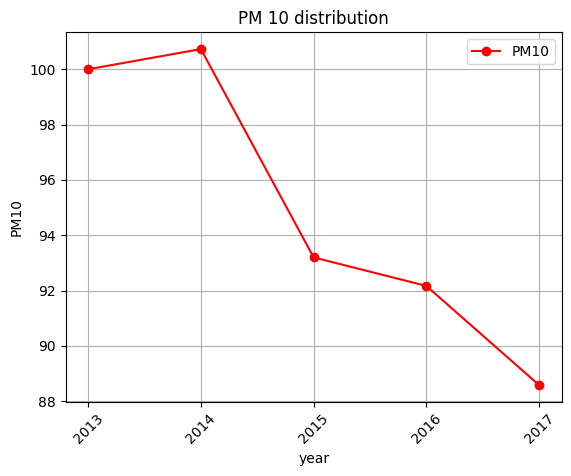

In [31]:
df_agg.plot(x='year', y='PM10', kind='line', color='red', marker='o')
plt.title('PM 10 distribution')
plt.xlabel('year')
plt.ylabel('PM10')
plt.xticks(range(len(df_agg['year'].unique())), df_agg['year'].unique(), rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Sebarapa sering turun hujan di daerah tersebut? dan adakah kaitannya dengan kualitas udara?

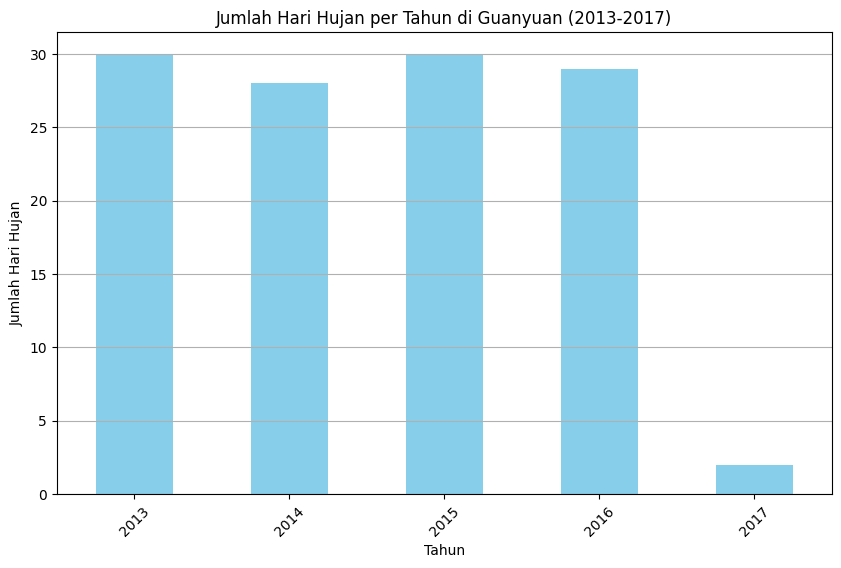

In [32]:
# Menghitung jumlah hari hujan per tahun
rainy_days_per_year = df_cleaned[df_cleaned['RAIN'] > 0].groupby('year')['day'].nunique()

# Plot jumlah hari hujan per tahun
plt.figure(figsize=(10, 6))
rainy_days_per_year.plot(kind='bar', color='skyblue')
plt.title('Jumlah Hari Hujan per Tahun di Guanyuan (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Hari Hujan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# export data cleaned to csv file
df_cleaned.to_csv('dashboard/main_data.csv', index=False)

## Conclusion

#### **Bagaimana kualitas Udara di daerah Guanyuan dari tahun 2013 sampai dengan tahun 2017 ? (berdasarkan PM10)**
PM10 adalah kualitas udara yang cukup berbahaya. berdasarkan hasil visualisai yang didapat, PM10 ini memuncak di tahun 2014, namun di tahun 2017 sudah menurun dan bisa dipastikan bahwa kualitas udara jadi lebih bersih dan lebih baik.

#### **Sebarapa sering turun hujan di daerah tersebut? dan adakah kaitannya dengan kualitas udara?**
Sepertinya kekurangan data pada tahun 2017 sehingga curah hujan mengecil, ataupun curah hujan memang tak nampak pada tahun itu. dilihat dari jumlah PM10 dan data curah hujan, tidak memiliki kaitan yang signifikan satu sama lain. bisa disimpulkan disini bahwa curah hujan tidak terlalu berpengaruh.